<a href="https://colab.research.google.com/github/JyotiChiluka/Appliances-Energy-Prediction_linear-regression/blob/main/Appliances_Energy_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Data-driven prediction of energy use of appliances**
The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions
were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the
temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for
10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters.
Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded
from a public data set from Reliable Prognosis (rp5.ru) and merged together with the
experimental data sets using the date and time column. Two random variables have been
included in the data set for testing the regression models and to filter out non-predictive attributes
(parameters)

date time year-month-day hour:minute:second

Appliances, energy use in Wh (Dependent variable)

lights, energy use of light fixtures in the house in Wh (Drop this column)
T1, Temperature in kitchen area, in Celsius
RH1, Humidity in kitchen area, in %

T2, Temperature in living room area, in Celsius RH2,
Humidity in living room area, in %

T3, Temperature in laundry room area
RH3, Humidity in laundry room area, in % 

T4, Temperature in office room, in Celsius RH4,
Humidity in office room, in %

T5, Temperature in bathroom, in Celsius
RH5, Humidity in bathroom, in % 

T6, Temperature outside the building (north side), in Celsius
RH6, Humidity outside the building (north side), in %

T7, Temperature in ironing room , in Celsius
RH7, Humidity in ironing room, in % 

T8, Temperature in teenager room 2, in Celsius RH8,
Humidity in teenager room 2, in %

T9, Temperature in parents room, in Celsius
RH9, Humidity in parents room, in % 

To, Temperature outside (from Chievres weather station), in
Celsius 

Pressure (from Chievres weather station), in mm Hg RHout, Humidity outside (from
Chievres weather station), in %

Wind speed (from Chievres weather station), in m/s

Visibility (from Chievres weather station), in km

Tdewpoint (from Chievres weather station), Â°C

rv1, Random variable 1, nondimensional

rv2, Random variable 2, nondimensional

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Import Statements**

In [3]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns

from datetime import datetime
import time
import dateutil

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt

#**Loading and inspecting data**

In [4]:
#Reading a data file  
dataset = pd.read_csv('/content/drive/MyDrive/Capstone Projects/data_application_energy.csv')

In [5]:
#It gives Top 5 rows of Dataset 
dataset.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [6]:
#It gives last 5 rows of Dataset
dataset.tail()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,45.590000,23.20,52.400000,24.796667,1.0,24.500000,44.500000,24.7000,50.07400,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,45.590000,23.23,52.326667,24.196667,1.0,24.557143,44.414286,24.7000,49.79000,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,45.730000,23.23,52.266667,23.626667,1.0,24.540000,44.400000,24.7000,49.66000,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,45.790000,23.20,52.200000,22.433333,1.0,24.500000,44.295714,24.6625,49.51875,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
19734,2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,45.963333,23.20,52.200000,21.026667,1.0,24.500000,44.054000,24.7360,49.73600,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


In [7]:
# It gives Total number of rows and columns of dataset
dataset.shape

(19735, 29)

The Dataset has 19735 rows and 29 columns.

In [8]:
#It gives total columns, data types and null count of dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [9]:
# table to return datatype, null count and unique counnt
def printinfo():
    temp = pd.DataFrame(index=dataset.columns)
    temp['data_type'] = dataset.dtypes
    temp['null_count'] = dataset.isnull().sum()
    temp['unique_count'] = dataset.nunique()
    return temp

printinfo()

,data_type,null_count,unique_count
date,object,0,19735
Appliances,int64,0,92
lights,int64,0,8
T1,float64,0,722
RH_1,float64,0,2547
T2,float64,0,1650
RH_2,float64,0,3376
T3,float64,0,1426
RH_3,float64,0,2618
T4,float64,0,1390


As shown above , there are no null values in the dataset

In [10]:
dataset.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

Dependent variable = 'Appliances'

In [11]:
dataset['lights'].value_counts()

0     15252
10     2212
20     1624
30      559
40       77
50        9
60        1
70        1
Name: lights, dtype: int64

There are many '0' values in 'lights' column so we will drop it. We are separating 'date' column into 'exact date' and 'days' so we will drop original 'date' column.

In [12]:
dataset["exact_date"]=dataset['date'].str.split(' ').str[0]
dataset["days"]=(dataset['date'].str.split(' ').str[0])
dataset["days"]=(dataset['days'].apply(dateutil.parser.parse, dayfirst=True))
dataset["days"]=(dataset['days'].dt.day_name())

In [13]:
dataset.drop(['lights','date'], axis = 1 , inplace = True)

In [14]:
dataset.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,exact_date,days
0,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,2016-01-11,Tuesday
1,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,2016-01-11,Tuesday
2,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,2016-01-11,Tuesday
3,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,2016-01-11,Tuesday
4,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,2016-01-11,Tuesday


In [15]:
#It gives some basic statistical details like percentile, mean, std, max etc.
dataset.describe()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530



Here, Appliances have mean value around 100 and minimum value is 10 whereas maximum is 1080. So we can ignore outliers.

In [16]:
dataset.skew()

Appliances     3.386367
T1             0.120917
RH_1           0.465774
T2             0.889658
RH_2          -0.268247
T3             0.450777
RH_3           0.467589
T4             0.170384
RH_4           0.444614
T5             0.558220
RH_5           1.866820
T6             0.597471
RH_6          -0.241961
T7             0.254722
RH_7           0.242141
T8            -0.256151
RH_8           0.308036
T9             0.382711
RH_9           0.368937
T_out          0.534273
Press_mm_hg   -0.420442
RH_out        -0.922997
Windspeed      0.859982
Visibility     0.441554
Tdewpoint      0.239374
rv1            0.004945
rv2            0.004945
dtype: float64


Here, Appliances have asymmetry in the distribution and we can say that the tail is larger towards the right hand side of the distribution.

In [17]:
numeric_features = dataset.describe().columns
numeric_features

Index(['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
       'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9',
       'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

#**Exploratory Data Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


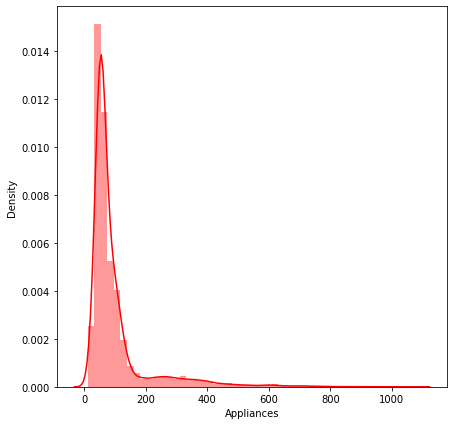

In [18]:
# Dependent variable 'Appliances'
plt.figure(figsize=(7,7))
sns.distplot(dataset['Appliances'],color="r")


Applying log transformation to the dependent variable for skewed distribution in large dataset.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


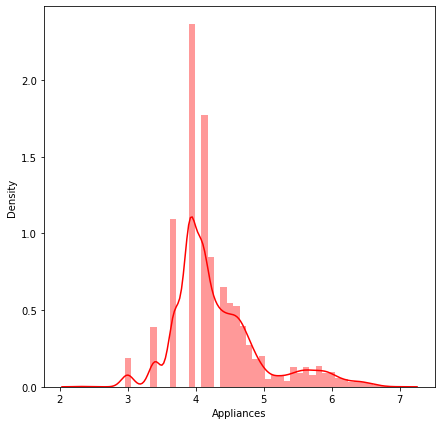

In [19]:
# Dependent variable 'Appliances'
plt.figure(figsize=(7,7))
sns.distplot(np.log(dataset['Appliances']),color="r")

In [20]:
#It returns a series containing counts of unique values.
dataset['Appliances'].value_counts()

50      4368
60      3282
40      2019
70      1560
80      1205
        ... 
870        1
890        1
900        1
860        1
1070       1
Name: Appliances, Length: 92, dtype: int64

In [21]:
print(dataset['Appliances'].mean())

97.6949581960983


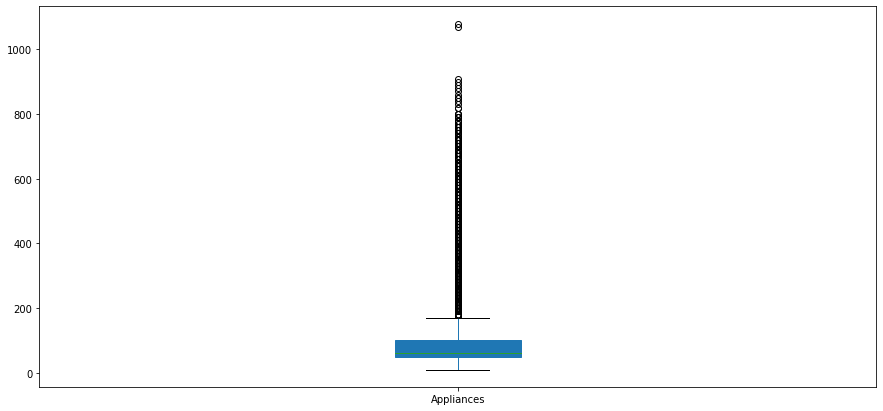

In [22]:
df = pd.DataFrame(data = dataset, columns = ["Appliances"])
df.plot(kind='box',patch_artist=True,figsize=(15,7))
plt.show()

Here, Appliances usage mean value is 97.69, So we are calculating Percentage of the Appliance Consumption which are less than 100 Wh(nearby 97.69).

In [23]:
print('Percentage of the appliance consumption less than 100 Wh')
print(((dataset['Appliances'][dataset['Appliances'] <= 100].count()) / (len(dataset['Appliances'])))*100 )

Percentage of the appliance consumption less than 100 Wh
78.55079807448695


Here,we are removing two outliers from 'Appliances'.

In [24]:
print(dataset['Appliances'].max())

1080


In [25]:
dataset.drop(dataset[dataset['Appliances']==1080].index, inplace=True)

In [26]:
print(dataset['Appliances'].max())

1070


In [27]:
dataset.drop(dataset[dataset['Appliances']==1070].index, inplace=True)

Converting percentage value of all the Relative humdities (RH) into decimals

In [28]:
#convert the percentage value of RH into decimals
def decimal(number):
  return number/100

In [29]:
dataset[['RH_1','RH_2','RH_3','RH_4','RH_5','RH_6','RH_7','RH_8','RH_9','RH_out']]=dataset[['RH_1','RH_2','RH_3','RH_4','RH_5','RH_6','RH_7','RH_8','RH_9','RH_out']].apply(decimal)

In [30]:
dataset.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,exact_date,days
0,60,19.89,0.475967,19.2,0.447900,19.79,0.447300,19.000000,0.455667,17.166667,0.5520,7.026667,0.842567,17.200000,0.416267,18.2,0.489000,17.033333,0.4553,6.600000,733.5,0.92,7.000000,63.000000,5.3,13.275433,13.275433,2016-01-11,Tuesday
1,60,19.89,0.466933,19.2,0.447225,19.79,0.447900,19.000000,0.459925,17.166667,0.5520,6.833333,0.840633,17.200000,0.415600,18.2,0.488633,17.066667,0.4556,6.483333,733.6,0.92,6.666667,59.166667,5.2,18.606195,18.606195,2016-01-11,Tuesday
2,50,19.89,0.463000,19.2,0.446267,19.79,0.449333,18.926667,0.458900,17.166667,0.5509,6.560000,0.831567,17.200000,0.414333,18.2,0.487300,17.000000,0.4550,6.366667,733.7,0.92,6.333333,55.333333,5.1,28.642668,28.642668,2016-01-11,Tuesday
3,50,19.89,0.460667,19.2,0.445900,19.79,0.450000,18.890000,0.457233,17.166667,0.5509,6.433333,0.834233,17.133333,0.412900,18.1,0.485900,17.000000,0.4540,6.250000,733.8,0.92,6.000000,51.500000,5.0,45.410389,45.410389,2016-01-11,Tuesday
4,60,19.89,0.463333,19.2,0.445300,19.79,0.450000,18.890000,0.455300,17.200000,0.5509,6.366667,0.848933,17.200000,0.412300,18.1,0.485900,17.000000,0.4540,6.133333,733.9,0.92,5.666667,47.666667,4.9,10.084097,10.084097,2016-01-11,Tuesday


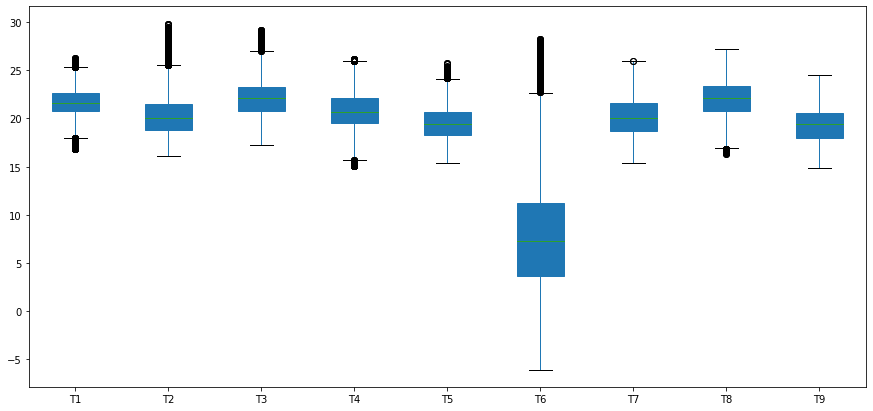

In [31]:
df = pd.DataFrame(data = dataset, columns = ["T1","T2","T3","T4","T5","T6","T7","T8","T9"])
df.plot(kind='box',patch_artist=True,figsize=(15,7))
plt.show()

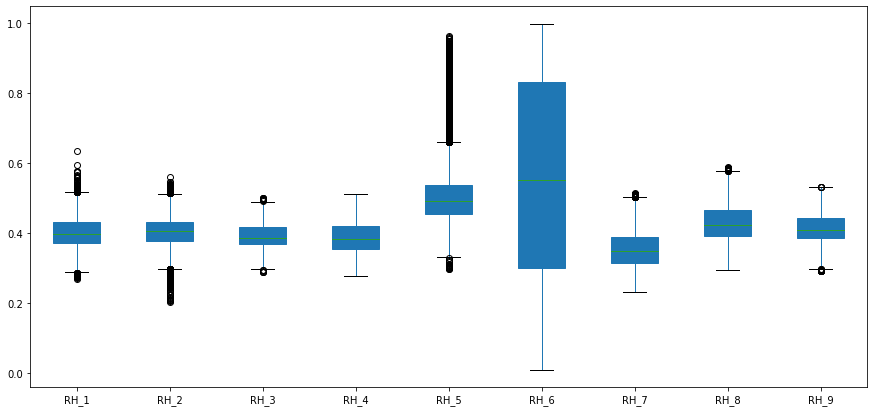

In [32]:
df = pd.DataFrame(data = dataset, columns = ["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"])
df.plot(kind='box',patch_artist=True,figsize=(15,7))
plt.show()

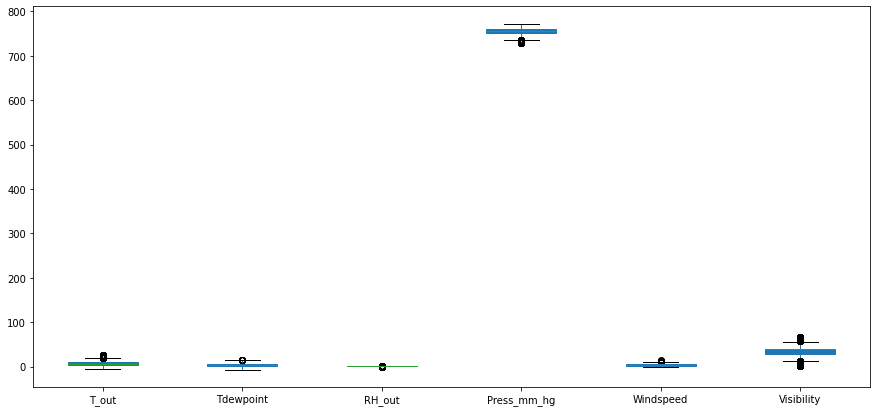

In [33]:
df = pd.DataFrame(data = dataset, columns = ["T_out", "Tdewpoint","RH_out","Press_mm_hg","Windspeed","Visibility"])
df.plot(kind='box',patch_artist=True,figsize=(15,7))
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


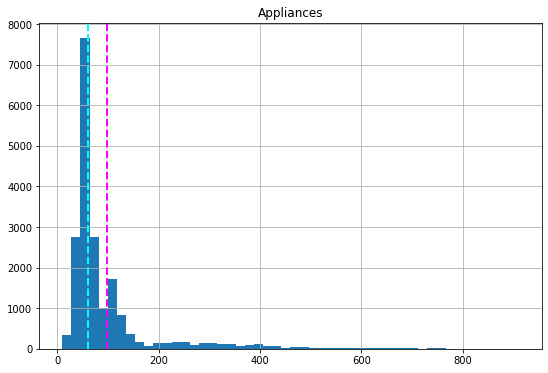

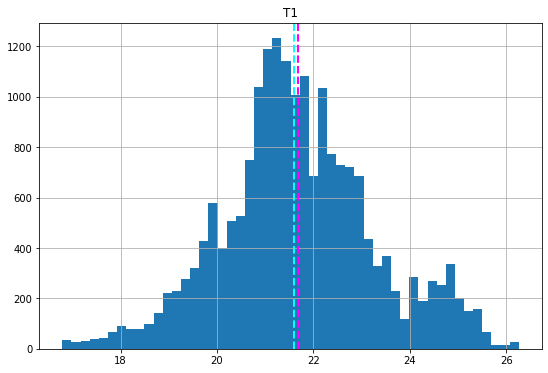

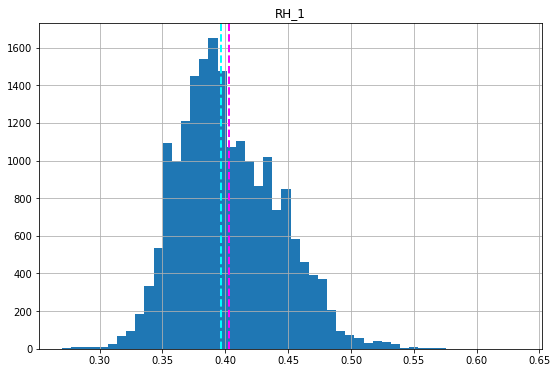

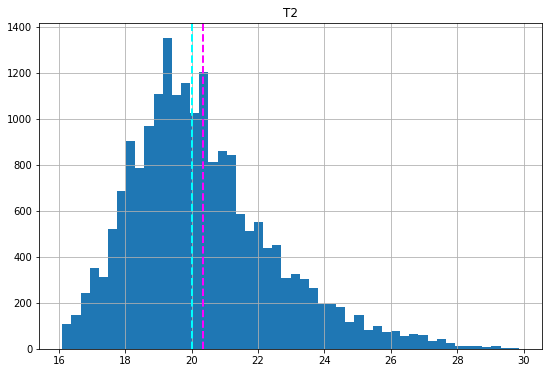

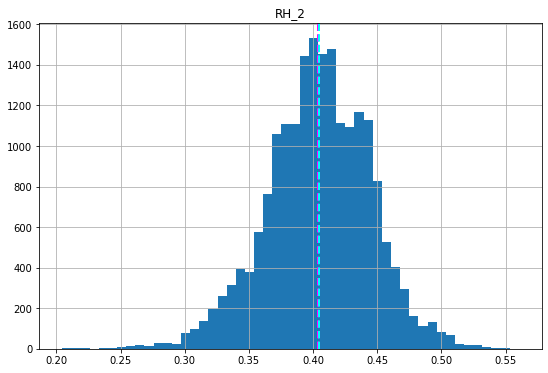

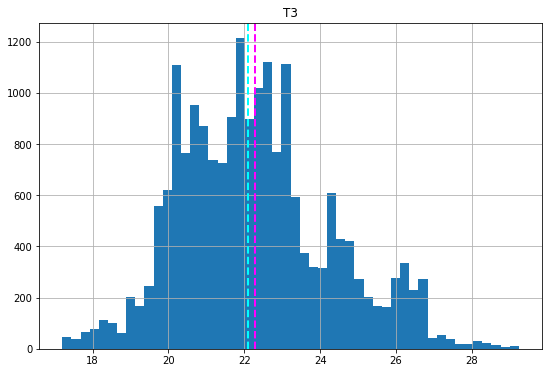

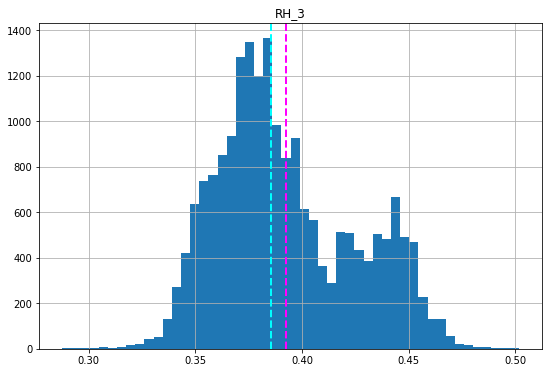

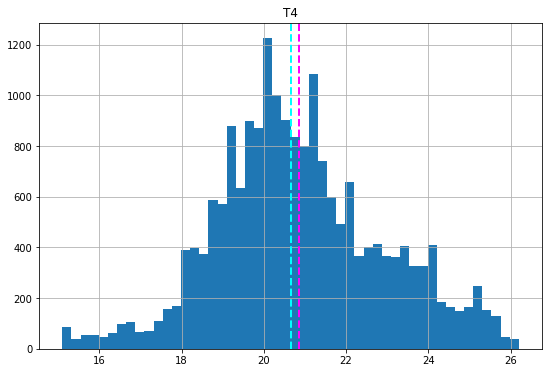

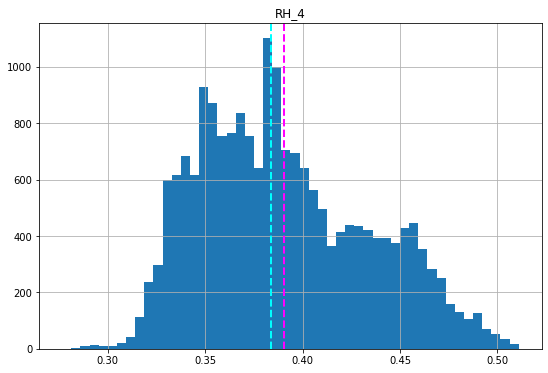

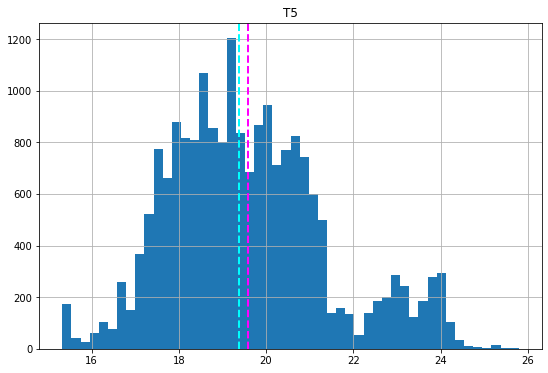

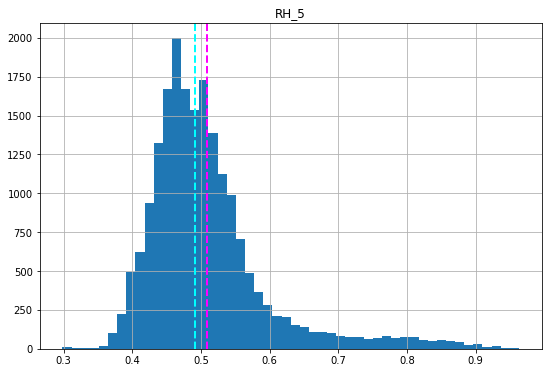

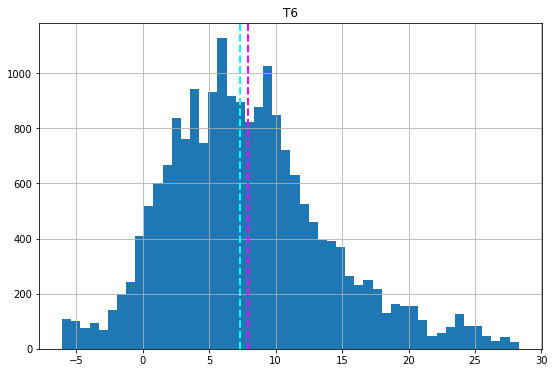

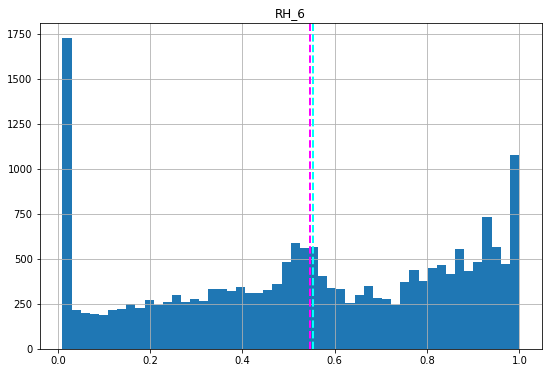

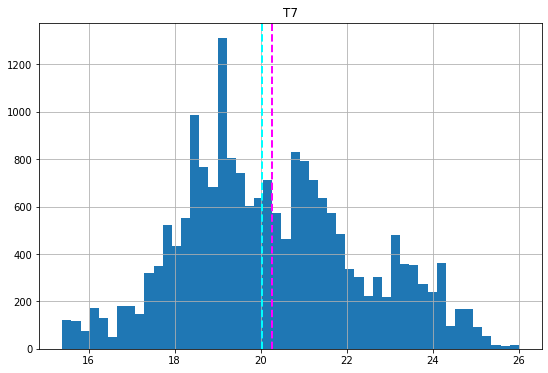

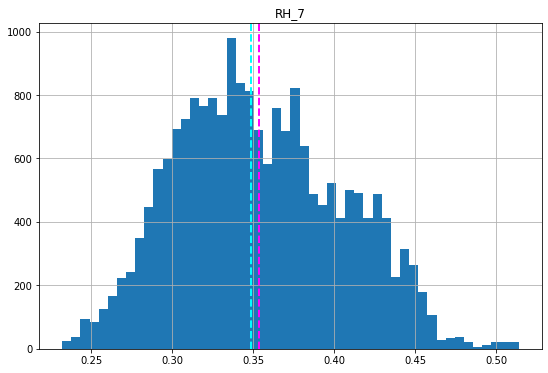

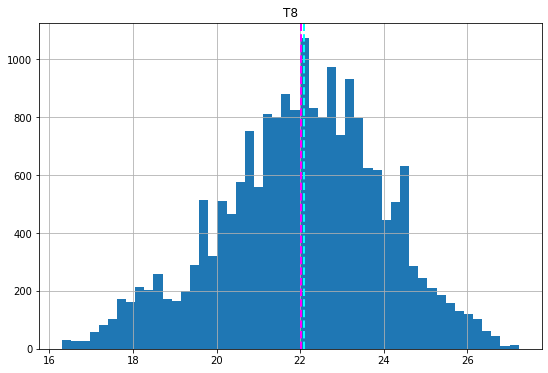

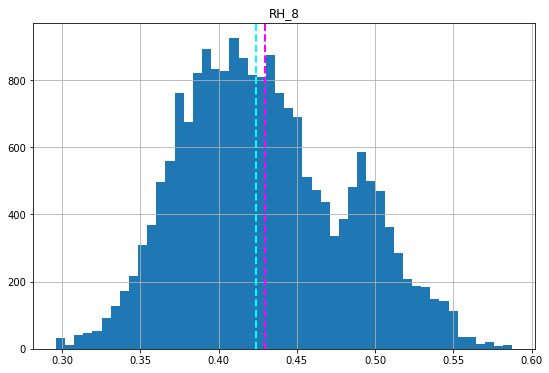

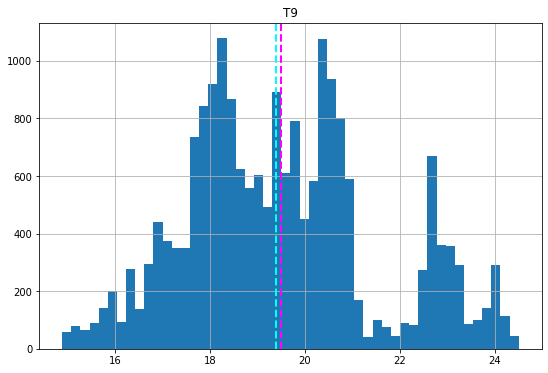

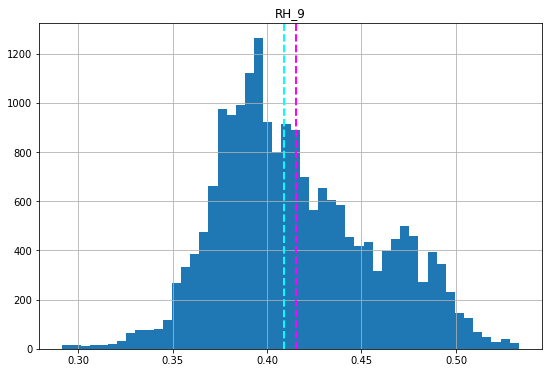

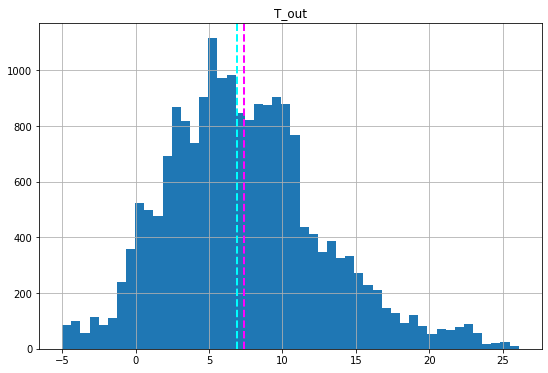

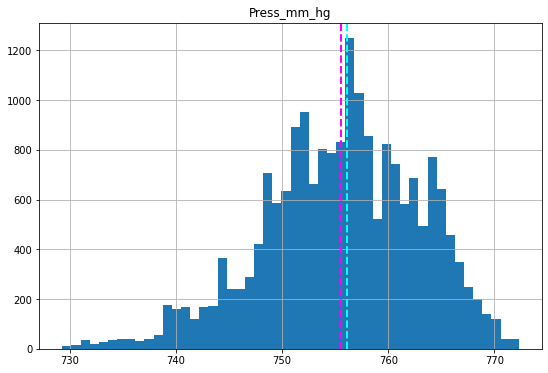

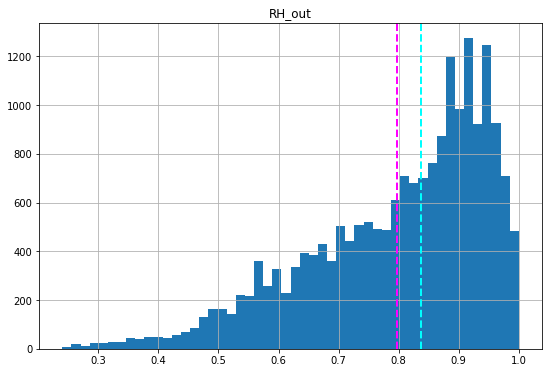

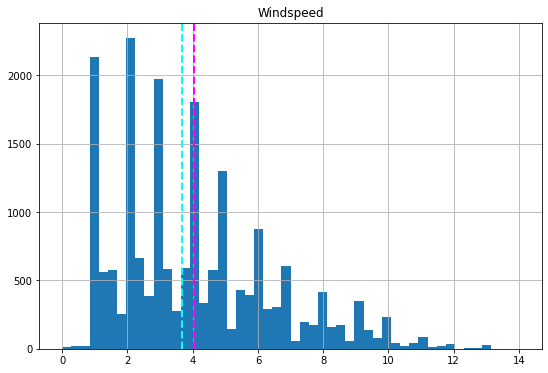

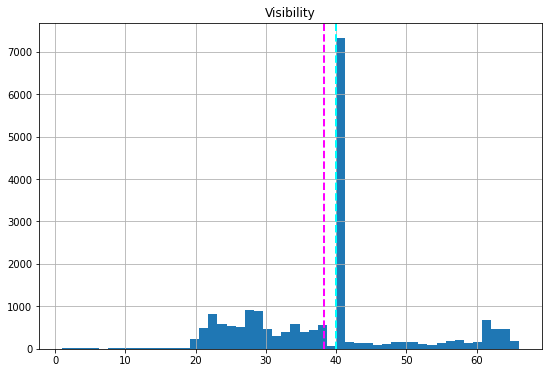

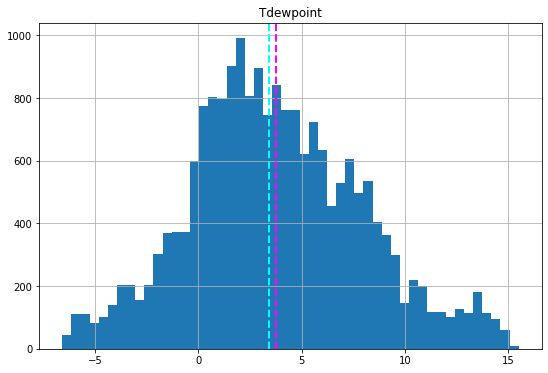

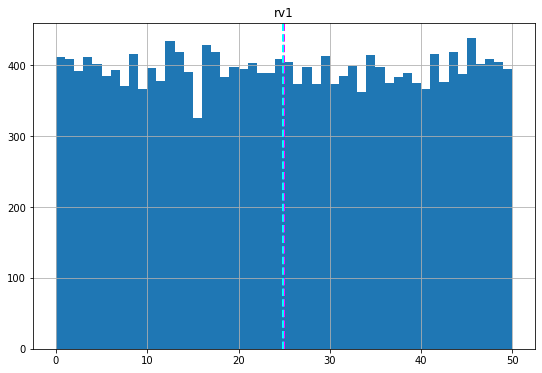

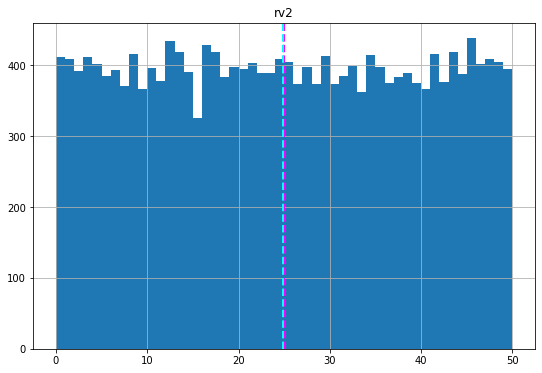

In [34]:
#@title Default title text
# plot a bar plot for each numerical feature count (except car_ID)

for col in numeric_features[0:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

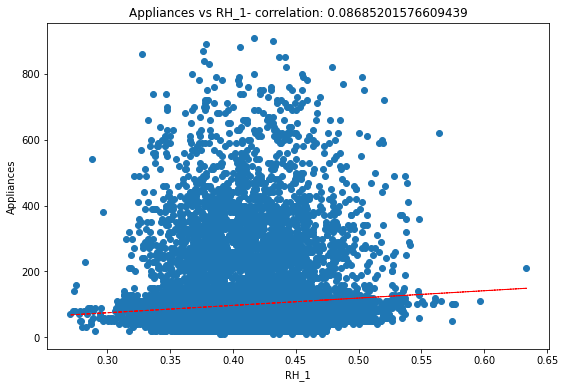

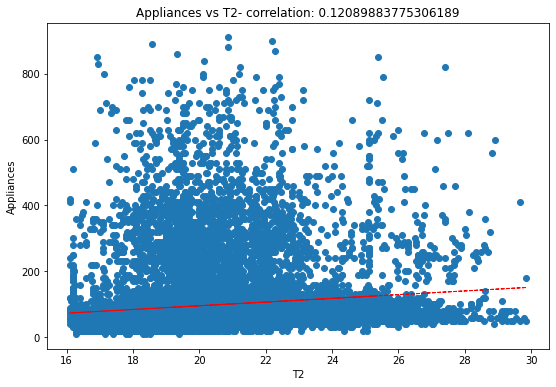

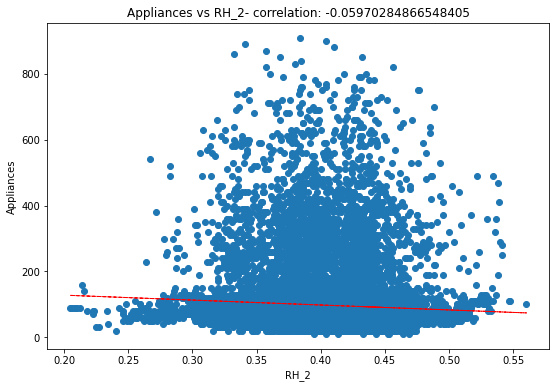

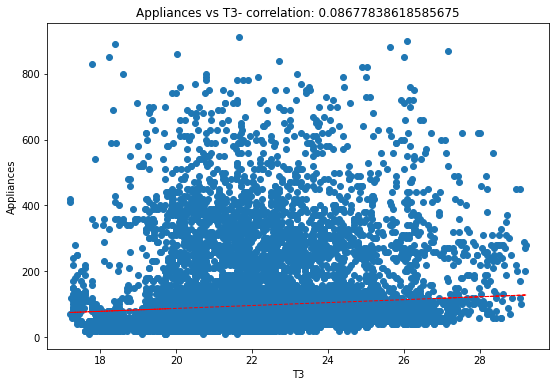

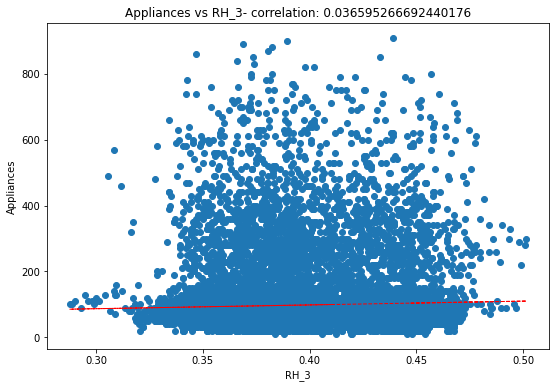

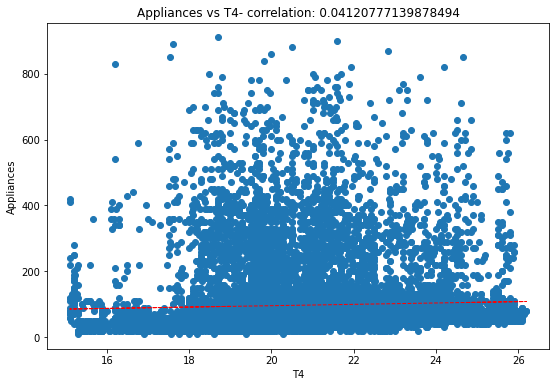

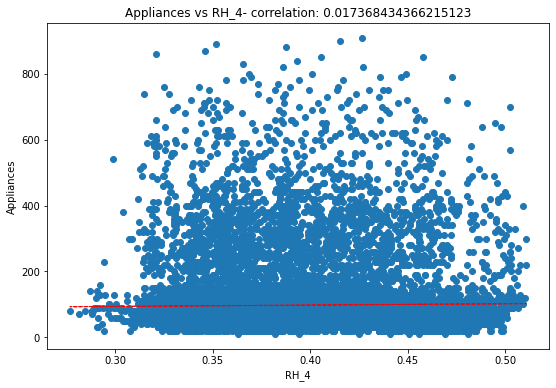

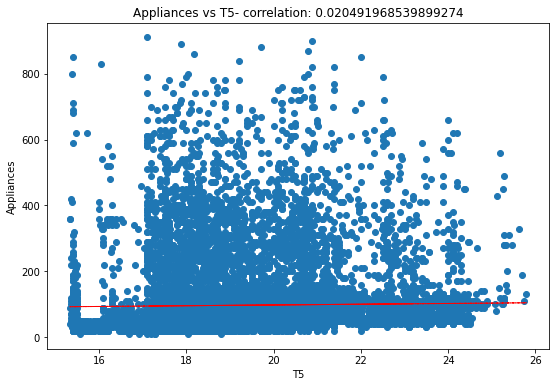

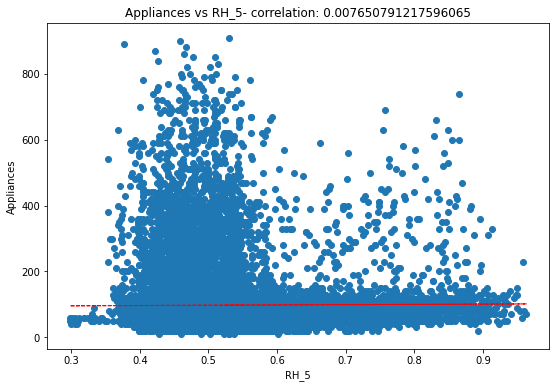

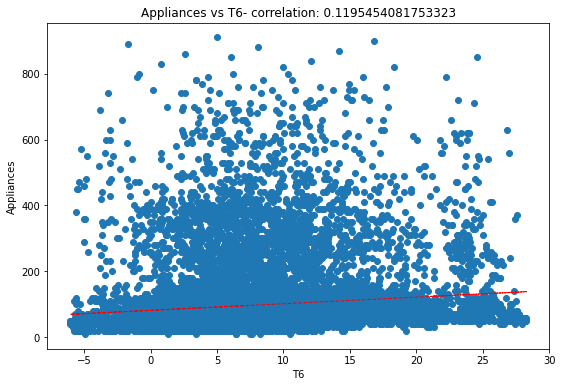

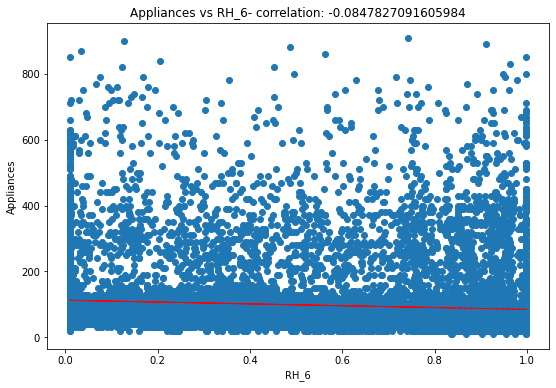

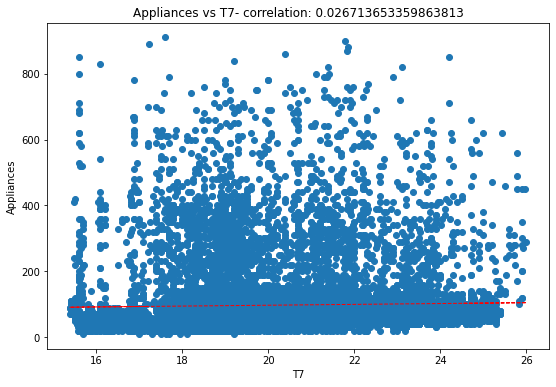

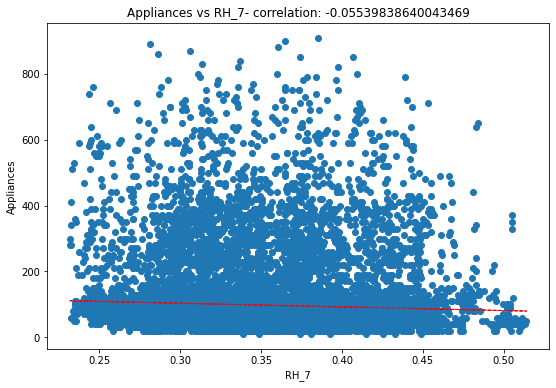

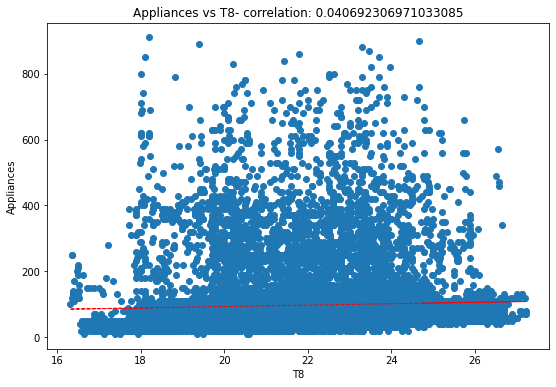

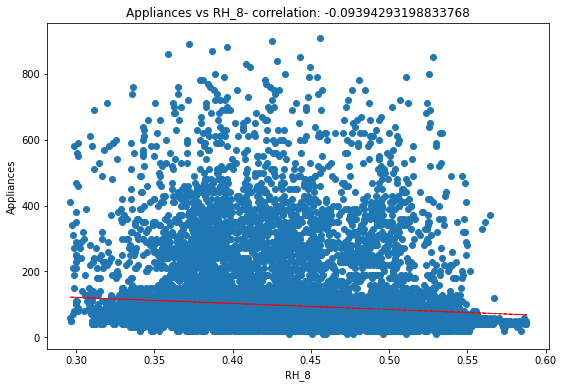

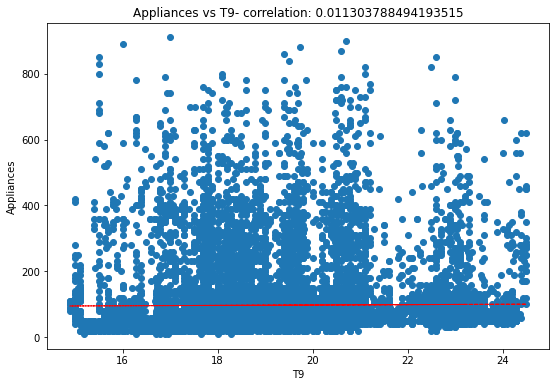

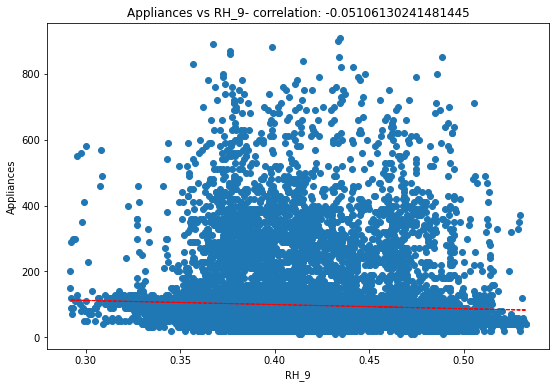

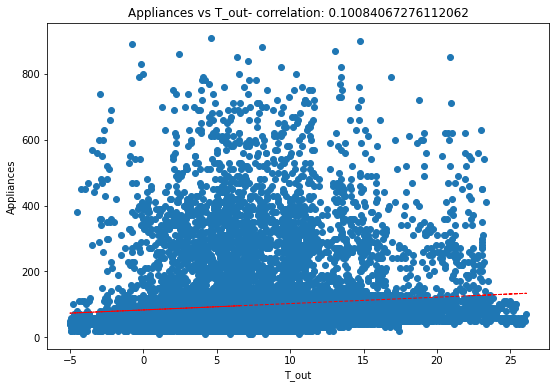

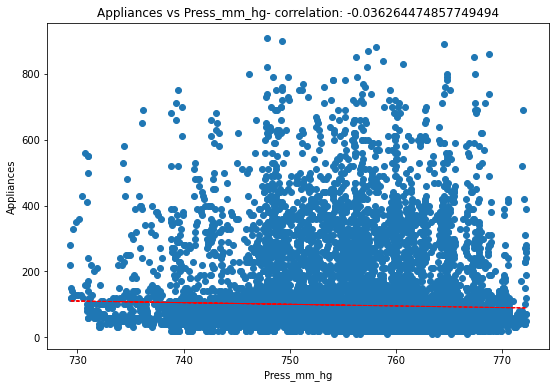

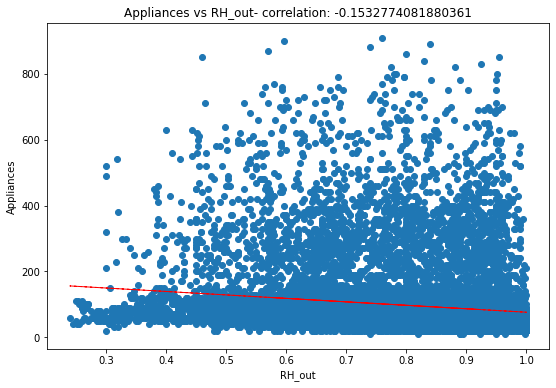

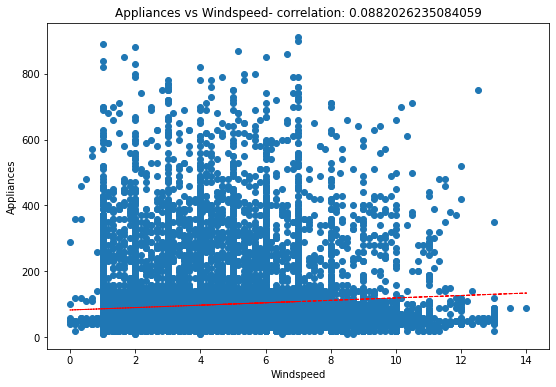

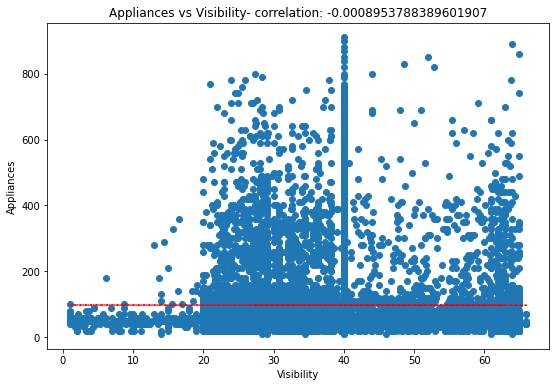

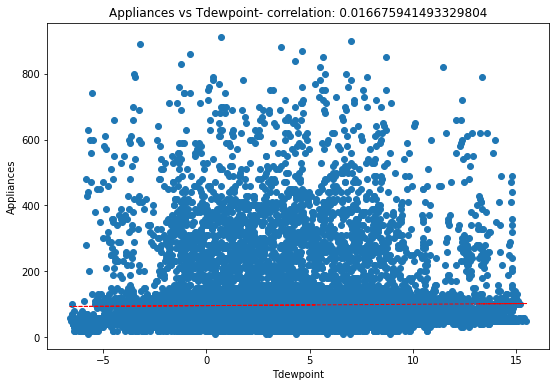

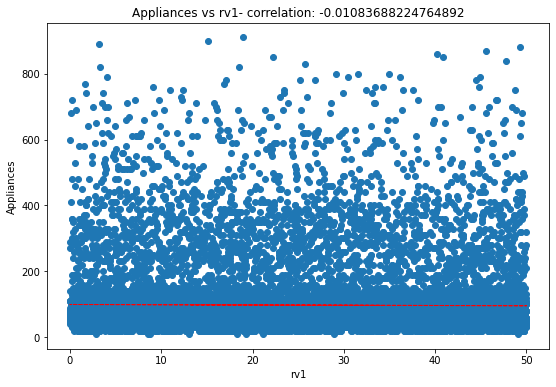

In [35]:
for col in numeric_features[2:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    label = dataset['Appliances']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Appliances')
    ax.set_title('Appliances vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(dataset[col], dataset['Appliances'], 1)
    y_hat = np.poly1d(z)(dataset[col])

    plt.plot(dataset[col], y_hat, "r--", lw=1)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


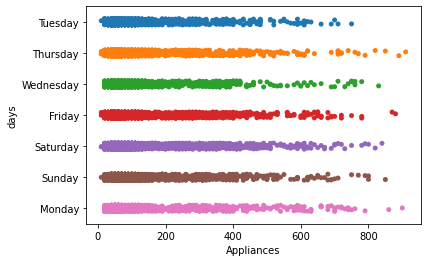

In [37]:
plt.figure()
sns.stripplot(dataset['Appliances'], "days", data = dataset)

There is no relation of Appliances usage between Weekdays and Weekends so we can ignore 'days'.

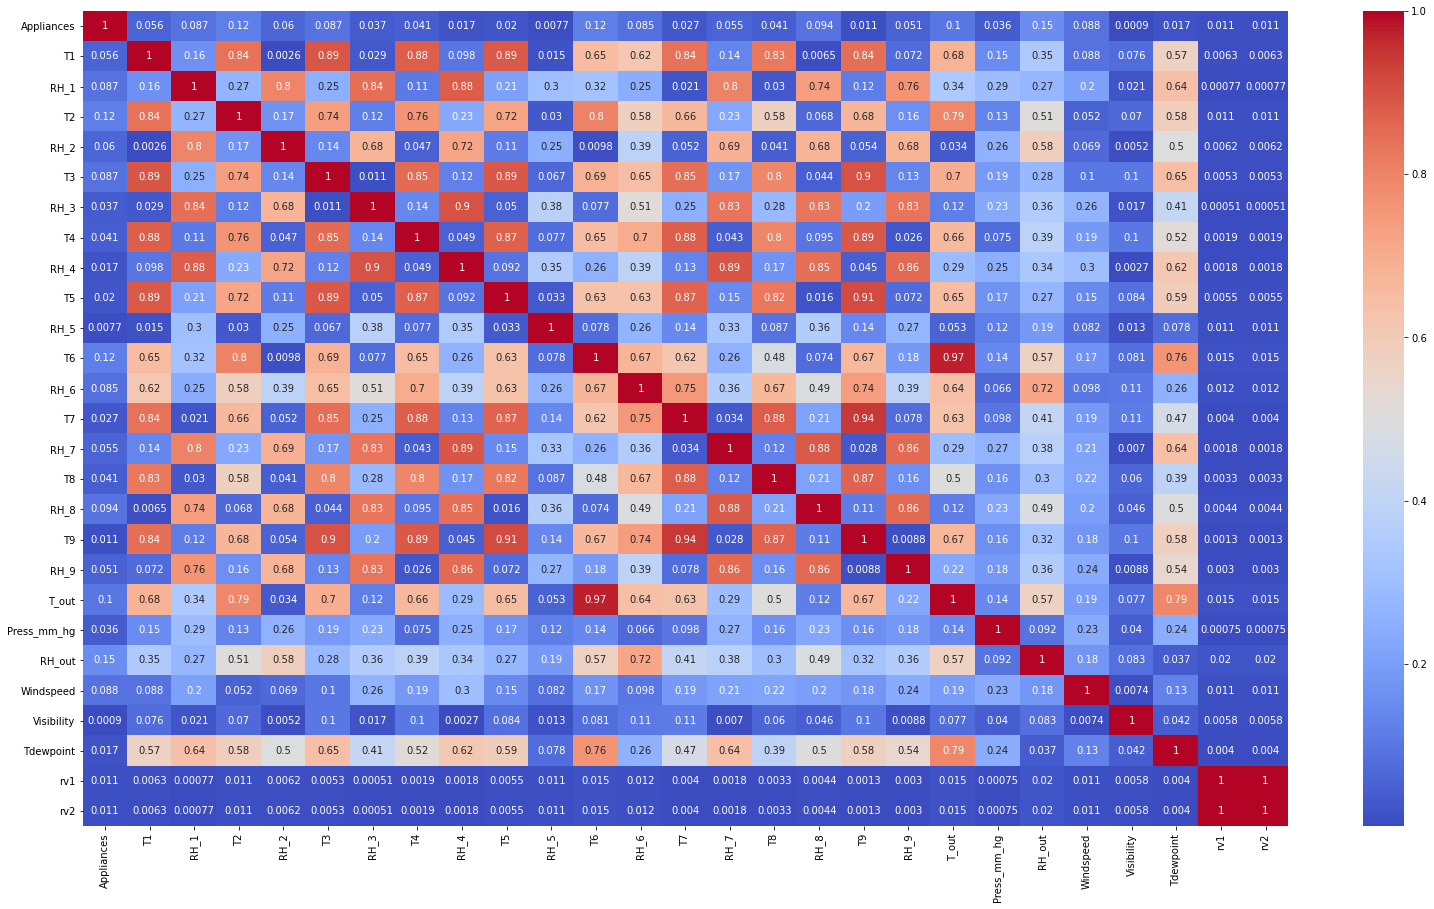

In [38]:
 ## Correlation
plt.figure(figsize=(27,15))
correlation = dataset.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

Here any feature of the Dataset doesn't have any significant correlation with the output. All the temperature variables having low and positive correlation with the target variable (Appliances), Random variable has not any significant relation with other feature of dataset

In [39]:
correlation

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
Appliances,1.000000,0.056260,0.086852,0.120899,-0.059703,0.086778,0.036595,0.041208,0.017368,0.020492,0.007651,0.119545,-0.084783,0.026714,-0.055398,0.040692,-0.093943,0.011304,-0.051061,0.100841,-0.036264,-0.153277,0.088203,-0.000895,0.016676,-0.010837,-0.010837
T1,0.056260,1.000000,0.163920,0.836829,-0.002609,0.892418,-0.028602,0.876990,0.097811,0.885249,-0.014881,0.654769,-0.615054,0.838694,0.135100,0.825409,-0.006511,0.844785,0.071689,0.682841,-0.150523,-0.345487,-0.087741,-0.076079,0.571284,-0.006265,-0.006265
RH_1,0.086852,0.163920,1.000000,0.269787,0.797544,0.253153,0.844681,0.106075,0.880365,0.205757,0.303180,0.316114,0.245208,0.021300,0.801101,-0.030142,0.736188,0.115177,0.763999,0.340735,-0.293948,0.274149,0.204865,-0.020899,0.639110,-0.000774,-0.000774
T2,0.120899,0.836829,0.269787,1.000000,-0.165687,0.735270,0.121463,0.762060,0.231533,0.720549,0.029530,0.801234,-0.580400,0.663650,0.229161,0.578184,0.068492,0.675550,0.157309,0.792287,-0.133009,-0.505301,0.052446,-0.069637,0.582609,-0.011131,-0.011131
RH_2,-0.059703,-0.002609,0.797544,-0.165687,1.000000,0.137166,0.678342,-0.047434,0.721438,0.110333,0.250187,-0.009833,0.390125,-0.051548,0.690568,-0.041155,0.679759,0.054390,0.676442,0.033529,-0.255549,0.584984,0.069094,-0.005188,0.499073,0.006207,0.006207
T3,0.086778,0.892418,0.253153,0.735270,0.137166,1.000000,-0.011288,0.852773,0.122678,0.888183,-0.066507,0.686825,-0.647628,0.847364,0.172529,0.795259,0.044328,0.901305,0.134504,0.699365,-0.189840,-0.281715,-0.100918,-0.102113,0.645817,-0.005278,-0.005278
RH_3,0.036595,-0.028602,0.844681,0.121463,0.678342,-0.011288,1.000000,-0.140524,0.898977,-0.050090,0.375394,0.076812,0.514975,-0.250154,0.832685,-0.283286,0.828823,-0.195336,0.833544,0.118186,-0.233281,0.356199,0.263161,0.017119,0.414392,-0.000514,-0.000514
T4,0.041208,0.876990,0.106075,0.762060,-0.047434,0.852773,-0.140524,1.000000,-0.048720,0.871816,-0.076614,0.652333,-0.703157,0.877751,0.043422,0.796242,-0.095283,0.889442,-0.025638,0.663456,-0.075208,-0.388612,-0.185862,-0.104616,0.519420,-0.001887,-0.001887
RH_4,0.017368,0.097811,0.880365,0.231533,0.721438,0.122678,0.898977,-0.048720,1.000000,0.091779,0.352554,0.259022,0.392254,-0.131271,0.894303,-0.167132,0.847254,-0.044589,0.856589,0.293263,-0.250731,0.336826,0.300158,0.002728,0.616514,-0.001827,-0.001827
T5,0.020492,0.885249,0.205757,0.720549,0.110333,0.888183,-0.050090,0.871816,0.091779,1.000000,0.032720,0.629142,-0.632369,0.870620,0.148857,0.824972,0.016337,0.911066,0.072255,0.651301,-0.170934,-0.273944,-0.145083,-0.084070,0.588334,-0.005531,-0.005531


#**Removing Multicollinearity and selecting relevant Features**

In [40]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [41]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['Appliances']]])

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,T1,3604.104348
1,RH_1,1639.616095
2,T2,2490.017329
3,RH_2,2164.338515
4,T3,1239.155390
5,RH_3,1567.762332
6,T4,932.716301
7,RH_4,1357.715241
8,T5,1187.885478
9,RH_5,45.091106


creating new features for reduction in multicollinearity

In [42]:
dataset['RH_2_press'] = dataset['Press_mm_hg']/dataset['RH_2']

In [43]:
dataset['T1_T2'] = dataset['T2']*dataset['T1']

In [44]:
dataset['RH_3_RH_out'] = dataset['RH_3']/dataset['RH_out']

In [45]:
dataset['RH_4_T7'] = dataset['T7']/dataset['RH_4']

In [46]:
dataset['T3_T5'] = dataset['T3']/dataset['T5']

In [47]:
dataset['temp_'] = dataset['T3_T5']/dataset['T1_T2']

In [48]:
dataset['RH_3_RH_out_RH_1'] = dataset['RH_3_RH_out']/dataset['RH_1']

In [49]:
dataset['RH_8_RH_9'] = dataset['RH_9']/dataset['RH_8']

In [50]:
dataset['T4_T8'] = dataset['T8']/dataset['T4'] 

In [51]:
dataset['RH_6_RH_7'] = dataset['RH_7']/dataset['RH_8']

In [52]:
dataset['T6_T_out'] = dataset['T_out']/dataset['T6']

In [53]:
dataset.drop(['T6_T_out'],axis = 1, inplace = True)

In [ ]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['Appliances','rv1','rv2','T9','RH_2','Press_mm_hg','T1','T2','RH_3','RH_out','RH_4'
,'T7','T3','T5','T3_T5','RH_3_RH_out','RH_1','RH_8','RH_9','T8','T4','RH_7','Visibility','T_out','RH_2_press','RH_8_RH_9','T4_T8','T1_T2']]])

,variables,VIF
0,RH_5,33.886304
1,T6,49.249180
2,RH_6,24.229162
3,Windspeed,4.624325
4,Tdewpoint,19.462279
5,RH_4_T7,100.224776
6,temp_,55.452478
7,RH_3_RH_out_RH_1,68.332990
8,RH_6_RH_7,197.566361


In [54]:
#Selecting relevant features 
X = dataset[['RH_5','T6','RH_6','Windspeed','Tdewpoint','RH_4_T7','temp_','RH_3_RH_out_RH_1']]

In [55]:
Y = dataset['Appliances']

#**Train Test Splitting**

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
#Split data into train and test
X_train,X_test,Y_train,Y_test = train_test_split(X,Y , test_size = 0.25,random_state = 0)

In [58]:
print(X_train.shape)
print(X_test.shape)

(14799, 8)
(4934, 8)


In [59]:
from sklearn.preprocessing import MinMaxScaler

In [60]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#**Fitting linear regression on the basis of new features**

In [61]:
reg = LinearRegression().fit(X_train, Y_train)

In [62]:
reg.score(X_train,Y_train)

0.04612715603110695

In [63]:
Y_pred = reg.predict(X_test)

In [64]:
reg.coef_

array([  12.88319529,  356.98423698,   18.38614207,   31.80041698,
       -276.14577749,  -26.73709342,  -29.05960804, -239.46475244])

In [65]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error((Y_test),(Y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 9926.511783280463
RMSE : 99.63188135973576


In [66]:
from sklearn.metrics import r2_score
r2 = r2_score((Y_test), (Y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((Y_test), (Y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.04749954222747543
Adjusted R2 :  0.04595233336205817


Fitting Regularized Linear regression (lasso) 

In [67]:
from sklearn.linear_model import Lasso

In [68]:
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X_train, Y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=3000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [69]:
lasso.score(X_train, Y_train)

0.04612715208668117

In [70]:
lasso.coef_

array([  12.87916868,  356.84582648,   18.36403932,   31.7971429 ,
       -276.03903942,  -26.75036091,  -29.04588805, -239.33088568])

In [71]:
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6089234.9733222425, tolerance: 12509.541775487749
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4321389.280462205, tolerance: 12429.029294703962
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12311427.175738312, tolerance: 12105.490309992412
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9002533

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [72]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0014}

Using  {'alpha': 0.0014}  the negative mean squared error is:  -9952.794943683017


In [73]:
y_pred_lasso = lasso_regressor.predict(X_test)
y_pred_train = lasso_regressor.predict(X_train)

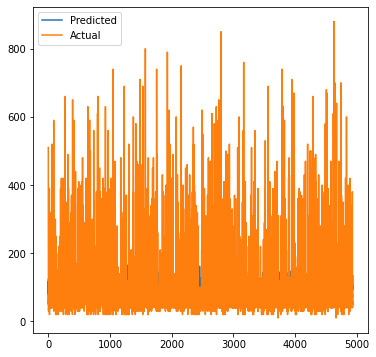

In [74]:
plt.figure(figsize=(6,6))
plt.plot((y_pred_lasso))
plt.plot((np.array(Y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

For Test Data

In [75]:
MSE  = mean_squared_error((Y_test), (y_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

test_r2 = r2_score((Y_test), (y_pred_lasso))
print("Test_R2 :" ,test_r2)
print("Test_Adjusted R2 : ",1-(1-r2_score((Y_test), (y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))


MSE : 9926.246796254445
RMSE : 99.63055152037674
Test_R2 : 0.047524969111470194
Test_Adjusted R2 :  0.045977801548605646


For Train Data 

In [76]:
MSE2  = mean_squared_error((Y_train), (y_pred_train))
print("MSE :" , MSE2)

RMSE2 = np.sqrt(MSE2)
print("RMSE :" ,RMSE2)

train_r2 = r2_score((Y_train), (y_pred_train))
print("Train_R2 :" ,train_r2)
print("Train_Adjusted R2 : ",1-(1-r2_score((Y_train), (y_pred_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE : 9932.576731546975
RMSE : 99.66231349686286
Train_R2 : 0.04612638255235402
Train_Adjusted R2 :  0.04561042657266634


#**Fitting all models on the basis of new created features**

In [77]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures

In [78]:
#creating the list of models
models = [
           ['Ridge: ', Ridge()],
           ['KNeighborsRegressor: ',  neighbors.KNeighborsRegressor()],
           ['SVR:' , SVR(kernel='rbf')],
           ['RandomForest ',RandomForestRegressor()],
           ['GradientBoostingRegressor: ', GradientBoostingRegressor()] ,
           ['XGBRegressor: ', xgb.XGBRegressor()] 
           
         ]

In [79]:
from math import sqrt
from sklearn.metrics import mean_squared_error

model_data = []
for name,fit_model in models :
    fit_model_data = {}
    fit_model.random_state = 78
    fit_model_data["Name"] = name
    fit_model.fit(X_train,Y_train)
    fit_model_data["Train_R2_Score"] = r2_score(Y_train,fit_model.predict(X_train))
    fit_model_data["Test_R2_Score"] = r2_score(Y_test,fit_model.predict(X_test))
    fit_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(Y_test,fit_model.predict(X_test)))
    fit_model_data["Train_RMSE_Score"] = sqrt(mean_squared_error(Y_train,fit_model.predict(X_train)))
    model_data.append(fit_model_data)


[10:01:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [80]:
model_data

[{'Name': 'Ridge: ',
  'Test_R2_Score': 0.04763657016429501,
  'Test_RMSE_Score': 99.62471451688583,
  'Train_R2_Score': 0.04600879822214021,
  'Train_RMSE_Score': 99.66845601147128},
 {'Name': 'KNeighborsRegressor: ',
  'Test_R2_Score': 0.46570734698556415,
  'Test_RMSE_Score': 74.62001565885284,
  'Train_R2_Score': 0.6796798543615741,
  'Train_RMSE_Score': 57.75341539975956},
 {'Name': 'SVR:',
  'Test_R2_Score': -0.061443037049223825,
  'Test_RMSE_Score': 105.17537784937119,
  'Train_R2_Score': -0.05651106349824353,
  'Train_RMSE_Score': 104.88721896507577},
 {'Name': 'RandomForest ',
  'Test_R2_Score': 0.5182339318941431,
  'Test_RMSE_Score': 70.85717588031066,
  'Train_R2_Score': 0.9316336158210827,
  'Train_RMSE_Score': 26.681291731626107},
 {'Name': 'GradientBoostingRegressor: ',
  'Test_R2_Score': 0.1605974458203323,
  'Test_RMSE_Score': 93.52998783890257,
  'Train_R2_Score': 0.22387158741060598,
  'Train_RMSE_Score': 89.89847757596995},
 {'Name': 'XGBRegressor: ',
  'Test_R2_Sc

In [81]:
#creating the dataframe of all models score
df = pd.DataFrame(model_data)

In [82]:
ab = df.sort_values(by = 'Train_R2_Score',ascending= False)

fitting polynomial features

polynomial(degree = 1)

In [83]:
polynomial_features= PolynomialFeatures(degree=1)
x_poly = polynomial_features.fit_transform(X_train)

model = LinearRegression()
model.fit(x_poly, Y_train)
y_poly_pred = model.predict(x_poly)

rmse= np.sqrt(mean_squared_error(Y_train,y_poly_pred))
r2 = r2_score(Y_train,y_poly_pred)
print("Train_RMSE= ",rmse)
print("Train_R2_Score =",r2)


Train_RMSE=  99.66227308967675
Train_R2_Score = 0.04612715603110695


In [84]:
polynomial_features= PolynomialFeatures(degree=1)
x_poly = polynomial_features.fit_transform(X_test)

model = LinearRegression()
model.fit(x_poly, Y_test)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(Y_test,y_poly_pred))
r2 = r2_score(Y_test,y_poly_pred)
print("Test_RMSE= ",rmse)
print("Test_R2_Score =",r2)

Test_RMSE=  99.47077286824187
Test_R2_Score = 0.050577509597395376


polynomial(degree = 2)

In [85]:
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X_train)

model = LinearRegression()
model.fit(x_poly, Y_train)
y_poly_pred = model.predict(x_poly)

rmse= np.sqrt(mean_squared_error(Y_train,y_poly_pred))
r2 = r2_score(Y_train,y_poly_pred)
print("Train_RMSE= ",rmse)
print("Train_R2_Score =",r2)

Train_RMSE=  97.72678033707838
Train_R2_Score = 0.08281680208957432


In [86]:
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X_test)

model = LinearRegression()
model.fit(x_poly, Y_test)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(Y_test,y_poly_pred))
r2 = r2_score(Y_test,y_poly_pred)
print("Test_RMSE= ",rmse)
print("Test_R2_Score =",r2)

Test_RMSE=  97.54014537194149
Test_R2_Score = 0.08707452182079245


polynomial(degree = 3)

In [87]:
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(X_train)

model = LinearRegression()
model.fit(x_poly, Y_train)
y_poly_pred = model.predict(x_poly)

rmse= np.sqrt(mean_squared_error(Y_train,y_poly_pred))
r2 = r2_score(Y_train,y_poly_pred)
print("Train_RMSE= ",rmse)
print("Train_R2_Score =",r2)

Train_RMSE=  94.63681292689562
Train_R2_Score = 0.1398996573453294


In [88]:
polynomial_features3= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(X_test)

model = LinearRegression()
model.fit(x_poly, Y_test)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(Y_test,y_poly_pred))
r2 = r2_score(Y_test,y_poly_pred)
print("Test_RMSE= ",rmse)
print("Test_R2_Score =",r2)

Test_RMSE=  93.1739271766322
Test_R2_Score = 0.16697634812365147


In [89]:
list_poly = [['polynomial(degree = 3)',0.699035,0.8742940,37.64486,55.55639],['Lasso',0.151375,0.129445,99.0662583,93.28977]]

In [90]:
ab2 = pd.DataFrame(list_poly , columns= ['Name','Train_R2_Score','Test_R2_Score','Test_RMSE_Score','Train_RMSE_Score'])

In [91]:
ab2

,Name,Train_R2_Score,Test_R2_Score,Test_RMSE_Score,Train_RMSE_Score
0,polynomial(degree = 3),0.699035,0.874294,37.644860,55.55639
1,Lasso,0.151375,0.129445,99.066258,93.28977


In [92]:
all_models = ab.append(ab2).set_index('Name')

In [93]:
all_models

,Train_R2_Score,Test_R2_Score,Test_RMSE_Score,Train_RMSE_Score
Name,,,,
RandomForest,0.931634,0.518234,70.857176,26.681292
KNeighborsRegressor:,0.679680,0.465707,74.620016,57.753415
GradientBoostingRegressor:,0.223872,0.160597,93.529988,89.898478
XGBRegressor:,0.213993,0.151493,94.035851,90.468791
Ridge:,0.046009,0.047637,99.624715,99.668456
SVR:,-0.056511,-0.061443,105.175378,104.887219
polynomial(degree = 3),0.699035,0.874294,37.644860,55.556390
Lasso,0.151375,0.129445,99.066258,93.289770


In [94]:
all_models = all_models.sort_values(by = 'Test_R2_Score',ascending= False)
all_models

,Train_R2_Score,Test_R2_Score,Test_RMSE_Score,Train_RMSE_Score
Name,,,,
polynomial(degree = 3),0.699035,0.874294,37.644860,55.556390
RandomForest,0.931634,0.518234,70.857176,26.681292
KNeighborsRegressor:,0.679680,0.465707,74.620016,57.753415
GradientBoostingRegressor:,0.223872,0.160597,93.529988,89.898478
XGBRegressor:,0.213993,0.151493,94.035851,90.468791
Lasso,0.151375,0.129445,99.066258,93.289770
Ridge:,0.046009,0.047637,99.624715,99.668456
SVR:,-0.056511,-0.061443,105.175378,104.887219


#**Fitting models on all feaṭures except rv1,rv2,Visibility**

Dropping random varibales because it has infinity vif factor..And visibility has very low relation close to Zero so no need of taking Visibility

In [95]:
#Again selecting the relevent features for improving the model performance
X_ = dataset[['T1','RH_1','T2','RH_2','T3','RH_3','T4',	'RH_4',	'T5','T6','T9','RH_5','RH_6','T7','RH_7',	'T8',	'RH_8',	'RH_9','T_out',	'Press_mm_hg',	'RH_out','Windspeed','Tdewpoint'	]]

In [96]:
X_.shape

(19733, 23)

In [97]:
X_train,X_test,Y_train,Y_test = train_test_split(X_, Y, test_size = 0.25, random_state = 0)

In [98]:
#Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [99]:
reg = LinearRegression().fit(X_train, Y_train)

In [100]:
reg.score(X_train,Y_train)

0.14768970070893306

In [101]:
Y_pred = reg.predict(X_test)
Y_pred

array([106.2780122 , 114.79755204,  81.17487211, ...,  99.79365887,
        77.60081446,  86.77718835])

In [102]:
reg.coef_

array([  17.85470374,  507.70723659, -274.25424428, -515.50461404,
        296.9756265 ,   97.11090758,   30.61918036,   38.82721632,
         -4.33708929,  255.92984555, -219.78456464,   14.48521906,
         34.89529604,   19.35171934,  -47.51157376,  110.44845079,
       -175.75857777,  -36.71488669, -334.35979026,    1.84154195,
        -68.80935508,   30.13477214,  118.46751019])

In [103]:
MSE  = mean_squared_error((Y_test),(Y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 8921.863157126649
RMSE : 94.45561474643341


In [104]:
r2 = r2_score((Y_test), (Y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((Y_test), (Y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.14390080555180162
Adjusted R2 :  0.139890564926077


**Not getting proper results on new features which created**

**Fitting Regularized Linear regression (lasso)**

In [105]:
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X_train, Y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=3000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [106]:
lasso.score(X_train, Y_train)

0.1476896578605409

In [107]:
lasso.coef_

array([  17.65672831,  507.50114637, -273.82776995, -515.01594305,
        296.94158966,   97.05160287,   30.57235999,   38.75271036,
         -4.35739822,  255.59777028, -219.74256147,   14.48063608,
         34.83522425,   19.28794312,  -47.4771807 ,  110.44998204,
       -175.77522067,  -36.70160334, -333.16934408,    1.83801319,
        -68.31047251,   30.15385654,  117.74582152])

In [108]:
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 53073963.679625496, tolerance: 12509.541775487749
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 53033784.31001579, tolerance: 12429.029294703962
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51436057.39182998, tolerance: 12105.490309992412
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52546110

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [109]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0014}

Using  {'alpha': 0.0014}  the negative mean squared error is:  -8924.430530763088


In [110]:
y_pred_lasso = lasso_regressor.predict(X_test)
y_pred_train = lasso_regressor.predict(X_train)

In [111]:
y_pred_lasso

array([106.13492965, 114.93209831,  81.18837463, ...,  99.96219194,
        77.419745  ,  87.02098946])

In [112]:
y_pred_train

array([ 57.42316059,  60.61914997,  69.42382843, ...,  63.08440003,
       116.35303436,  95.40403944])

for test data

In [113]:
MSE  = mean_squared_error((Y_test), (y_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

test_r2 = r2_score((Y_test), (y_pred_lasso))
print("Test_R2 :" ,test_r2)
print("Test_Adjusted R2 : ",1-(1-r2_score((Y_test), (y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 8921.294396200046
RMSE : 94.4526039672811
Test_R2 : 0.1439553811222315
Test_Adjusted R2 :  0.13994539614581836


for train data

In [114]:
MSE2  = mean_squared_error((Y_train), (y_pred_train))
print("MSE :" , MSE2)

RMSE2 = np.sqrt(MSE2)
print("RMSE :" ,RMSE2)

train_r2 = r2_score((Y_train), (y_pred_train))
print("Train_R2 :" ,train_r2)
print("Train_Adjusted R2 : ",1-(1-r2_score((Y_train), (y_pred_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE : 8875.096964510552
RMSE : 94.20773303986543
Train_R2 : 0.1476813041022652
Train_Adjusted R2 :  0.1463545135773483


**Fitting of all models**

In [115]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures

In [116]:
models = [
           ['Ridge: ', Ridge()],
           ['KNeighborsRegressor: ',  neighbors.KNeighborsRegressor()],
           ['SVR:' , SVR(kernel='rbf')],
           ['RandomForest ',RandomForestRegressor()],
           ['GradientBoostingRegressor: ', GradientBoostingRegressor()] ,
           ['XGBRegressor: ', xgb.XGBRegressor()] 
           
         ]

In [117]:
from math import sqrt
from sklearn.metrics import mean_squared_error

model_data = []
for name,fit_model in models :
    fit_model_data = {}
    fit_model.random_state = 78
    fit_model_data["Name"] = name
    fit_model.fit(X_train,Y_train)
    fit_model_data["Train_R2_Score"] = r2_score(Y_train,fit_model.predict(X_train))
    fit_model_data["Test_R2_Score"] = r2_score(Y_test,fit_model.predict(X_test))
    fit_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(Y_test,fit_model.predict(X_test)))
    fit_model_data["Train_RMSE_Score"] = sqrt(mean_squared_error(Y_train,fit_model.predict(X_train)))
    model_data.append(fit_model_data)


[10:04:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [118]:
model_data

[{'Name': 'Ridge: ',
  'Test_R2_Score': 0.1437188535882794,
  'Test_RMSE_Score': 94.46565182601228,
  'Train_R2_Score': 0.14688779045183076,
  'Train_RMSE_Score': 94.25157681053184},
 {'Name': 'KNeighborsRegressor: ',
  'Test_R2_Score': 0.4739838430670331,
  'Test_RMSE_Score': 74.03980677604534,
  'Train_R2_Score': 0.6811097023977769,
  'Train_RMSE_Score': 57.62437111584286},
 {'Name': 'SVR:',
  'Test_R2_Score': -0.010494438987382004,
  'Test_RMSE_Score': 102.6201626353669,
  'Train_R2_Score': -0.0031558117131691432,
  'Train_RMSE_Score': 102.20443520784707},
 {'Name': 'RandomForest ',
  'Test_R2_Score': 0.5640905021929756,
  'Test_RMSE_Score': 67.40062140445988,
  'Train_R2_Score': 0.9381920325923895,
  'Train_RMSE_Score': 25.369258675857115},
 {'Name': 'GradientBoostingRegressor: ',
  'Test_R2_Score': 0.24415897119519558,
  'Test_RMSE_Score': 88.75257578804471,
  'Train_R2_Score': 0.3269546064113825,
  'Train_RMSE_Score': 83.7158563218316},
 {'Name': 'XGBRegressor: ',
  'Test_R2_Scor

In [119]:
df = pd.DataFrame(model_data)

In [124]:
ab = df.sort_values(by = 'Train_R2_Score',ascending= False).set_index('Name')
ab

,Train_R2_Score,Test_R2_Score,Test_RMSE_Score,Train_RMSE_Score
Name,,,,
RandomForest,0.938192,0.564091,67.400621,25.369259
KNeighborsRegressor:,0.681110,0.473984,74.039807,57.624371
GradientBoostingRegressor:,0.326955,0.244159,88.752576,83.715856
XGBRegressor:,0.326198,0.255104,88.107623,83.762868
Ridge:,0.146888,0.143719,94.465652,94.251577
SVR:,-0.003156,-0.010494,102.620163,102.204435


So... there is no much difference between the new features and old features..
so we are tuning the hyperparameters on the basis of old features itself..

**Barplot of all models**

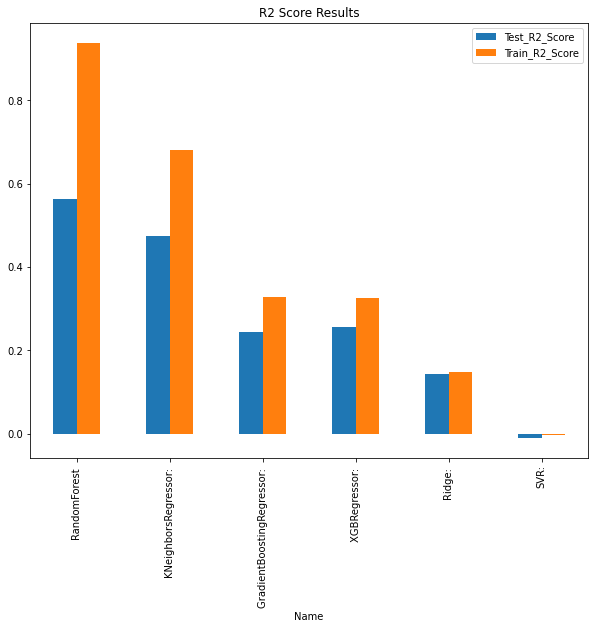

In [125]:
ab.plot(y=['Test_R2_Score','Train_R2_Score'], kind="bar" , title = 'R2 Score Results' , figsize= (10,8)) ;

#**Hyperparameter Tuning using GridSearchCV** 

In [ ]:
#Tuning the hyperparameters of Random forest using GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = [{
              'max_depth': [10, 20, 30, 40, 50, 60, 70,80],
              'n_estimators' : [100,150,200,250],
              'max_features': ["auto", "sqrt", "log2"]
            }]
reg = RandomForestRegressor(random_state=40)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = reg, param_grid = param_grid, cv = 5, n_jobs = -1 , scoring='r2' , verbose=2)
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 31.4min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 77.1min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 104.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=40,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [ ]:
grid_search.best_params_

{'max_depth': 60, 'max_features': 'sqrt', 'n_estimators': 250}

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=60, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=250, n_jobs=None, oob_score=False,
                      random_state=40, verbose=0, warm_start=False)

In [ ]:
grid_search.best_estimator_.score(X_train,Y_train)

0.9434541975986162

In [ ]:
grid_search.best_estimator_.score(X_test,Y_test)

0.5864961299637497

In [ ]:
np.sqrt(mean_squared_error(Y_test, grid_search.best_estimator_.predict(X_test)))

65.64558516057404

In [ ]:
np.sqrt(mean_squared_error(Y_train, grid_search.best_estimator_.predict(X_train)))

24.265303711829215

In [138]:
#making a list of specific model score
list_final = [['polynomial(degree = 3)',0.699035,0.8742940,37.64486,55.55639],['Lasso',0.151375,0.129445,99.0662583,93.28977],['Tuned Random Forest',0.9434,0.5864,65.645,24.26]]

In [139]:
#creating Dataframe
ab2 = pd.DataFrame(list_final , columns= ['Name','Train_R2_Score','Test_R2_Score','Test_RMSE_Score','Train_RMSE_Score']).set_index('Name')

In [140]:
#appending list into original Dataframe
all_models_ = ab.append(ab2).sort_values(by = 'Train_R2_Score',ascending= False)
all_models_

,Train_R2_Score,Test_R2_Score,Test_RMSE_Score,Train_RMSE_Score
Name,,,,
Tuned Random Forest,0.943400,0.586400,65.645000,24.260000
RandomForest,0.938192,0.564091,67.400621,25.369259
polynomial(degree = 3),0.699035,0.874294,37.644860,55.556390
KNeighborsRegressor:,0.681110,0.473984,74.039807,57.624371
GradientBoostingRegressor:,0.326955,0.244159,88.752576,83.715856
XGBRegressor:,0.326198,0.255104,88.107623,83.762868
Lasso,0.151375,0.129445,99.066258,93.289770
Ridge:,0.146888,0.143719,94.465652,94.251577
SVR:,-0.003156,-0.010494,102.620163,102.204435


**Updated Bar Plot**

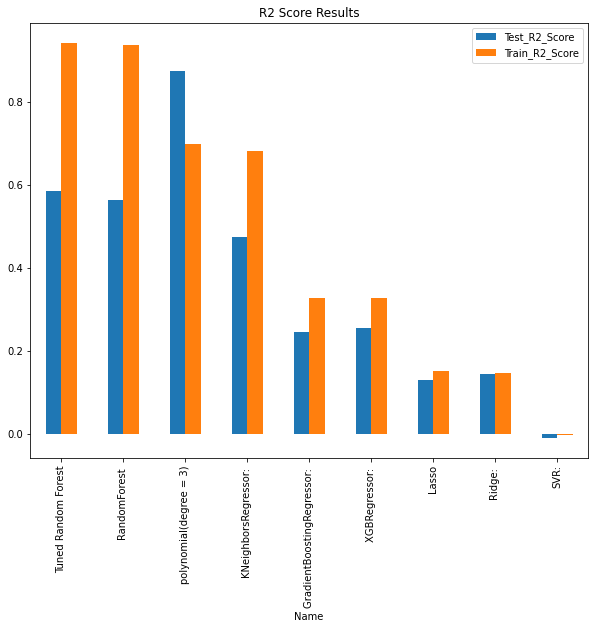

In [141]:
#Bar plot of all the model scores
all_models_.plot(y=['Test_R2_Score','Train_R2_Score'], kind="bar" , title = 'R2 Score Results' , figsize= (10,8)) ;

#**Conclusion**



*  The dataset does not contain any null values.. but there is very less correlation between the features and target variables 

*  Dropped some irrelevent features like rv1 , rv2 which has infinity (variance inflation factor)...so no use of these features and Visibility which has very less correlation 

*  Worked on reduction of multicollinearity by created some new features with  some proper relation but there is not showing any imporovement in the results.. so we continued with old features itself 

*  By fitting all the models we are getting best score in Random forest regressor after tuning the hyperparameters using Grid Search CV on this model ..not getting much difference Train r score is 0.94 and Test r score is 0.5864 because of improper dataset and less correlation


*  The performance is low due to various reasons like: no proper pattern of data, too much data, less correlation, not enough relevant features.







